# NuclearPy - Pseudotime analysis

This interactive notebook describes the workflow to analyze previously-processed NuclearPy data for pseudotime analysis.


## Pre-requisite

Please make sure that `NuclearPy` is successfully installed on your local computer. Installation instructions can be found on `NuclearPy` [GitHub repository](https://github.com/f-hamidlab/nuclearpy).


We begin by importing the Analyzor class from `nuclearpy` module.

In [1]:
from nuclearpy.analyzer import Analyzor
import matplotlib.pyplot as plt
import scanpy as sc

Pass the path to example output to `Analyzor` class function:

In [2]:
obj = Analyzor(collated_csv = "../data/sample_output/Ngn2_Temporal.csv")

Normalize DAPI channell and keep predicted single cells.

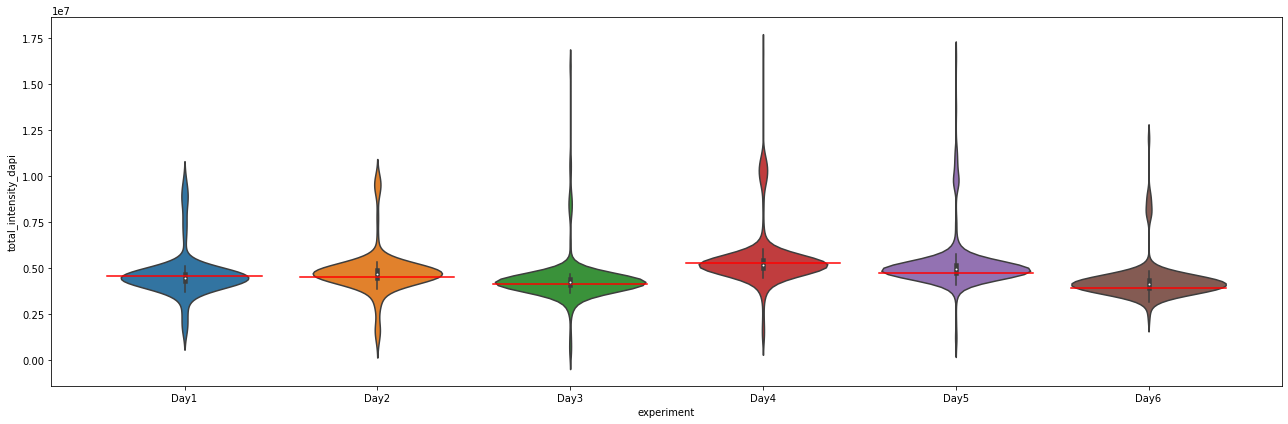

Using dapi channel for qualifying single cells


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 41.00it/s]


In [3]:
obj.normChannel(channel = "dapi", method = "mode", nbins = 40, intensity_type = "total")
obj.findSingleCells(byExperiment = True, nbins = 40, spread = 0.4, channel = "dapi")
obj.filterCells(filter = "isSingleCell == True", inplace = True)

Next, choose the variable features to be included in the pseudotime analysis. <br>
These are the list of all varible feature:

In [4]:
obj.showADataVars()

['avg_intensity_dapi',
 'nuclear_area',
 'nuclear_perimeter',
 'major_axis',
 'minor_axis',
 'axes_ratio',
 'circularity',
 'eccentricity',
 'solidity',
 'avg_intensity_core_dapi',
 'avg_intensity_internal_ring_dapi',
 'avg_intensity_external_ring_dapi',
 'total_intensity_core_dapi',
 'total_intensity_internal_ring_dapi',
 'total_intensity_external_ring_dapi',
 'total_intensity_dapi',
 'avg_intensity_beta3',
 'total_intensity_beta3',
 'avg_intensity_rfp',
 'total_intensity_rfp',
 'avg_intensity_ngn2',
 'total_intensity_ngn2',
 'dna_peaks',
 'dna_dots',
 'dna_dots_size_median',
 'spatial_entropy']

These are the features we include in the analysis:

- avg_intensity_dapi
- nuclear_area
- major_axis
- avg_intensity_internal_ring_dapi
- avg_intensity_beta3
- avg_intensity_rfp
- dna_dots
- spatial_entropy

In [5]:
include_feat = ['avg_intensity_dapi',
 'nuclear_area',
 'major_axis',
 'avg_intensity_internal_ring_dapi',
 'avg_intensity_beta3',
 'avg_intensity_rfp',
 'dna_dots',
 'spatial_entropy']
obj.includeVars(vars = include_feat)

Construct diffusion map

In [6]:
obj.findNeighbours(method = "umap")
obj.findClusters(method = "leiden", res=.15)
obj.runDimReduc(method = "diffmap")

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:06)
running Leiden clustering
    finished: found 3 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.996267   0.98665375 0.977028   0.96671027 0.96172106
     0.9570944  0.94174594 0.9369341  0.9219315  0.91477054 0.90057707
     0.8960569  0.8906268  0.8850975 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)


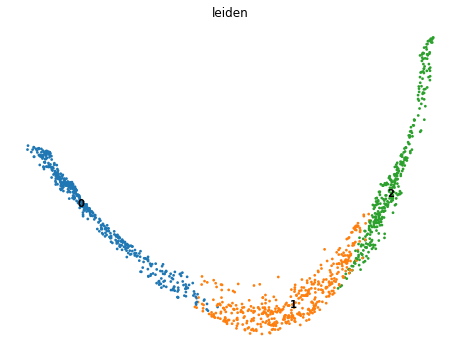

In [7]:
obj.plotDim(hue = "leiden", method="diffmap")

Choose root cells for diffusion pseudotime

In [8]:
%matplotlib tk
root_cells = obj.chooseCells(reduction = "diffmap")

In [9]:
%matplotlib inline

computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


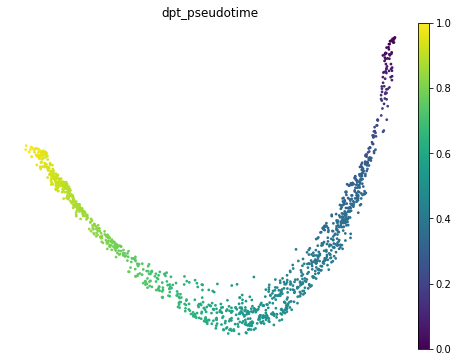

In [11]:
obj.runPT(root_cells = root_cells)
obj.plotDim(hue = "dpt_pseudotime", method="diffmap")

Visualize changes in features between clusters:

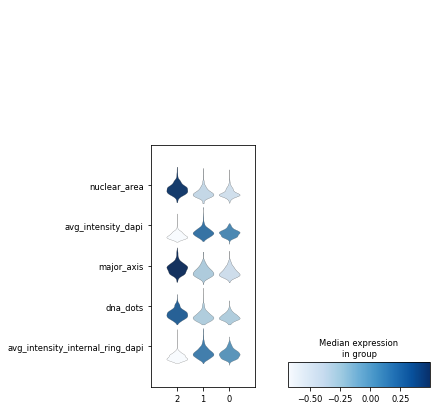

In [12]:
obj.normAData(method = "standardscaler")
fig, ax = plt.subplots(figsize = (5, 7))

markers = ['nuclear_area','avg_intensity_dapi','major_axis','dna_dots','avg_intensity_internal_ring_dapi']
sc.pl.stacked_violin(obj.adata, markers, groupby = 'leiden', swap_axes = True, ax = ax, dendrogram = False, categories_order=['2','1','0'])
fig.tight_layout()
plt.show()

Visualize changes in features across pseudotime

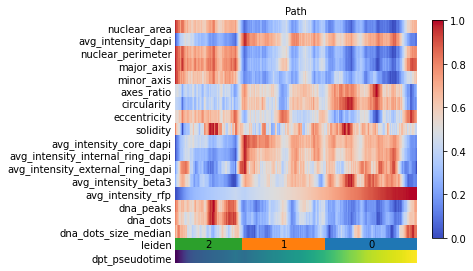

In [13]:
pseudotime_path = [2,1,0]
markers = ['nuclear_area',
           'avg_intensity_dapi',
           'nuclear_perimeter',
           'major_axis',
           'minor_axis',
           'axes_ratio',
           'circularity',
           'eccentricity',
           'solidity',
           'avg_intensity_core_dapi',
           'avg_intensity_internal_ring_dapi',
           'avg_intensity_external_ring_dapi', 
           'avg_intensity_beta3',
           'avg_intensity_rfp',
          'dna_peaks',
          'dna_dots',
          'dna_dots_size_median']
sc.pl.paga_path(
    obj.adata, 
    pseudotime_path, 
    markers,
    show_node_names = True,
    n_avg = 50,
    annotations = ['dpt_pseudotime'],
    show_colorbar = True,
    color_map = 'coolwarm',
    groups_key = 'leiden',
    color_maps_annotations = {'dpt_pseudotime': 'viridis'},
    title = 'Path',
    return_data = False,
    normalize_to_zero_one = True,
    show = True
)

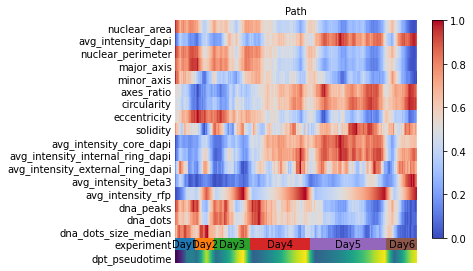

In [14]:
pseudotime_path = [0,1,2,3,4,5]
markers = ['nuclear_area',
           'avg_intensity_dapi',
           'nuclear_perimeter',
           'major_axis',
           'minor_axis',
           'axes_ratio',
           'circularity',
           'eccentricity',
           'solidity',
           'avg_intensity_core_dapi',
           'avg_intensity_internal_ring_dapi',
           'avg_intensity_external_ring_dapi', 
           'avg_intensity_beta3',
           'avg_intensity_rfp',
          'dna_peaks',
          'dna_dots',
          'dna_dots_size_median']
sc.pl.paga_path(
    obj.adata, 
    pseudotime_path, 
    markers,
    show_node_names = True,
    n_avg = 50,
    annotations = ['dpt_pseudotime'],
    show_colorbar = True,
    color_map = 'coolwarm',
    groups_key = 'experiment',
    color_maps_annotations = {'dpt_pseudotime': 'viridis'},
    title = 'Path',
    return_data = False,
    normalize_to_zero_one = True,
    show = True
)